In [12]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
fashion_mnist = keras.datasets.fashion_mnist;

In [14]:
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data();

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
print(X_train_full.shape);
print(Y_train_full.shape);
print(X_test.shape);
print(Y_test.shape);

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0;
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:];

In [17]:
nomes_classes = ["camisa/top", "calca", "casaco", "vestido", "jaqueta", "sandalia", "camiseta", "tenis", "bolsa", "bota"];

In [18]:
nomes_classes[Y_train[0]];

In [19]:
X_train[0];

camiseta


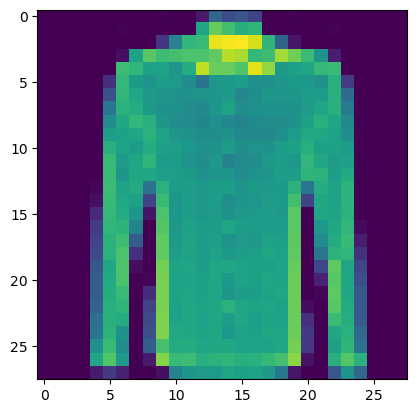

In [22]:
exemplo_n = 15;
print(nomes_classes[Y_train[exemplo_n]]);
plt.imshow(X_train[exemplo_n], interpolation = "nearest");
plt.show();

In [2]:
model = keras.models.Sequential();
model.add(keras.layers.Flatten(input_shape = [28, 28]));
model.add(keras.layers.Dense(300, activation = "relu"));
model.add(keras.layers.Dropout(rate = 0.1));
model.add(keras.layers.Dense(100, activation = "relu"));
model.add(keras.layers.Dropout(rate = 0.1));
model.add(keras.layers.Dense(10, activation = "softmax"));

NameError: name 'keras' is not defined

In [25]:
model.summary();

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"]);

In [30]:
history = model.fit(X_train, Y_train, epochs = 5, validation_data=(X_valid, Y_valid));

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6397 - loss: 1.0976 - val_accuracy: 0.8272 - val_loss: 0.5223
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8081 - loss: 0.5550 - val_accuracy: 0.8504 - val_loss: 0.4409
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8354 - loss: 0.4766 - val_accuracy: 0.8522 - val_loss: 0.4266
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8436 - loss: 0.4403 - val_accuracy: 0.8628 - val_loss: 0.3935
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8535 - loss: 0.4172 - val_accuracy: 0.8662 - val_loss: 0.3815


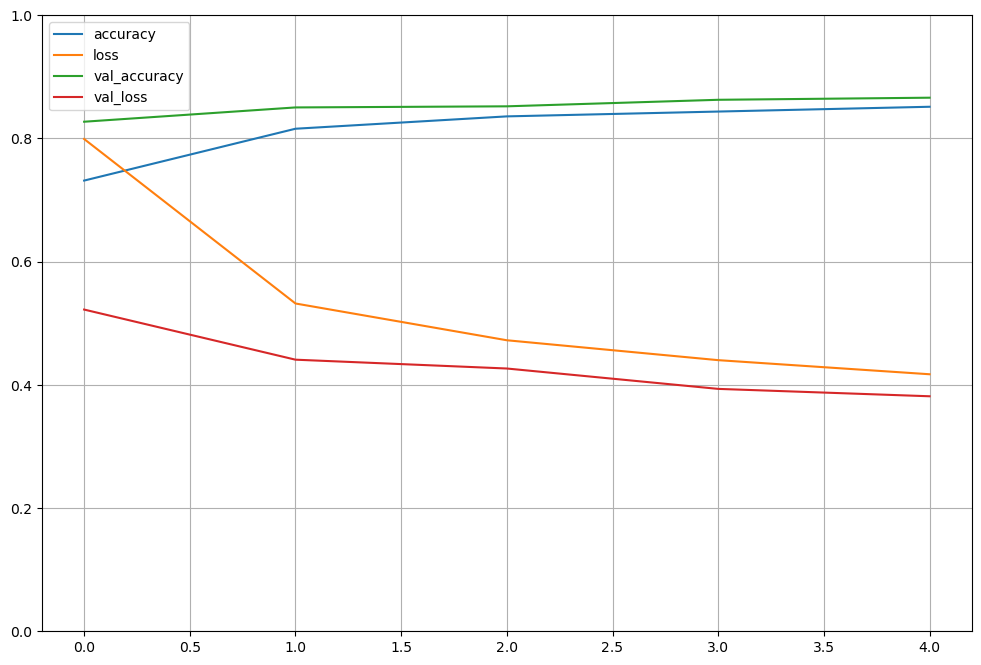

In [31]:
pd.DataFrame(history.history).plot(figsize=(12,8));
plt.grid(True);
plt.gca().set_ylim(0,1);
plt.show();

In [32]:
model.evaluate(X_test, Y_test, verbose = 1);

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8236 - loss: 59.8813


In [33]:
X_novo = X_test[:4];
Y_proba = model.predict(X_novo);
Y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
Y_prob = model.predict(X_novo)
Y_pred = np.argmax(Y_prob, axis=1)
print(Y_pred)
print(np.array(nomes_classes)[Y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[9 2 1 1]
['bota' 'casaco' 'calca' 'calca']


[9 2 1 1]
casaco


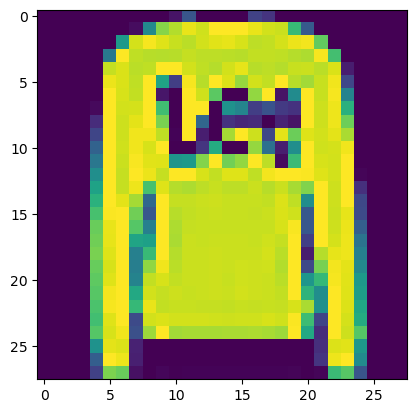

In [36]:
Y_novo = Y_test[:4];
print(Y_novo);
np.array(nomes_classes)[Y_pred];
print(nomes_classes[Y_pred[1]]);
plt.imshow(X_novo[1], interpolation="nearest");
plt.show();